# Data Science Project: Planning Stage (Individual) - Maggie Leung

Problem: Predicting Usage of a Video Game Research Server

## (1) Data Description
Here is a summary of the players.csv dataset
| Variable | Type of variable | Number of observations | What does this variable mean |
|:-----------|:-----------------|:------------------------:|:---------------------------|
| `experience` | Character (chr) | 196 | Player’s experience level |
| `subscribe` | Logical (lgl) | 196 | Whether the player is subscribed or not |
| `hashedEmail` | Character (chr) | 196 | Player’s hashed email address 
| `played_hours` | Double (dbl) | 196 | Time spent in games by players
| `name` | Character (chr) | 196 | Name of players
| `gender` | Character (chr)| 196 | Gender of players
| `Age` | Double (dbl)| 194 | Age (in years) of player


| Statistics | `played_hours` | `Age` | 
|:-----------|:--------------:|:-----:|
| Mean | 5.85 | 20.52 |
| Minimum | 0 | 8 | 
| Maximum | 223.1 | 50 |




Issues in the dataset:
- The two missing values in `Age` columns means there will be less data points tha can be used to perform statistical analysis. Though, the large amount of data could compensate this effect. 
- The `gender` column consists of 7 distinct categories, meaning that there might be an underrepresentation of certain categories. 
- The timeframe of the data collected for the `played_hours` column is unknown, thus it is unclear whether it is over one continuous period or multiple periods. This dataframe might also account for hours that the player has the game open but wasn't actually playing it because they forgot to close the game.
- The extreme values will affect performance of statistics such as calculating the mean.

## (2) Questions:
Chosen broad question - Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various plyaers types. The specific question generated by me will include predicting subscription status based on 3 factors: `played_hours`, `Age`, and `experience`. The question is: "Can played hours, age, and experience predict subscription status in the players.csv dataset?" In order to predict the subscription status of players, we would need to read, select, visualize, and use KNN classification to find the closest distance compared to the targetted data point.



## (3) Exploratory Data Analysis and Visualization:
To load the dataset into R, first use the `read_csv` function.
<br> 
First, we have to load the functions that potentialy relate to reading the data into the notebook. Then we can use `read_csv` function to read and load the raw link of players.csv file from GitHub. The data is now available to read.






In [2]:
library(readr)
library(tidyr)
library(dplyr) 
library(tidyverse)

players <- read_csv("https://raw.githubusercontent.com/maggieleung930/DSCI-project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


After successfully loading and reading the data into the notebook, we can:
1. Converts categorical variables (`experience`, `gender`, and `subscribe`) into factors using `mutate` function. This will allow us to call these variables when visualizing the data.
2. Remove the two N.A. values in the `Age` column. The whole row that contain missing values will be discarded (filtered out) using `!is.na()` function.
3. Remove `name` column as it will not be used in our data analysis and visualization. 

In [4]:
players_wrangle <- players |>
    mutate(experience = as.factor(experience), gender = as.factor(gender), subscribe = as.factor(subscribe)) |>
    filter(!is.na(Age)) |>
    select(-name)
players_wrangle

experience,subscribe,hashedEmail,played_hours,gender,Age
<fct>,<fct>,<chr>,<dbl>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Male,17


We will then now compute the mean value for each quantitative variable in the data set. Steps will be shown and the mean values will be reported in a table format. 

In [6]:
players_mean <- players_wrangle |>
    summarize(played_hours_mean = mean(played_hours), age_mean = mean(Age))
players_mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.904639,20.52062


For data visualization, we will compare it by using scatterplot and bar plot.

This is the step and plot for scatterplot.

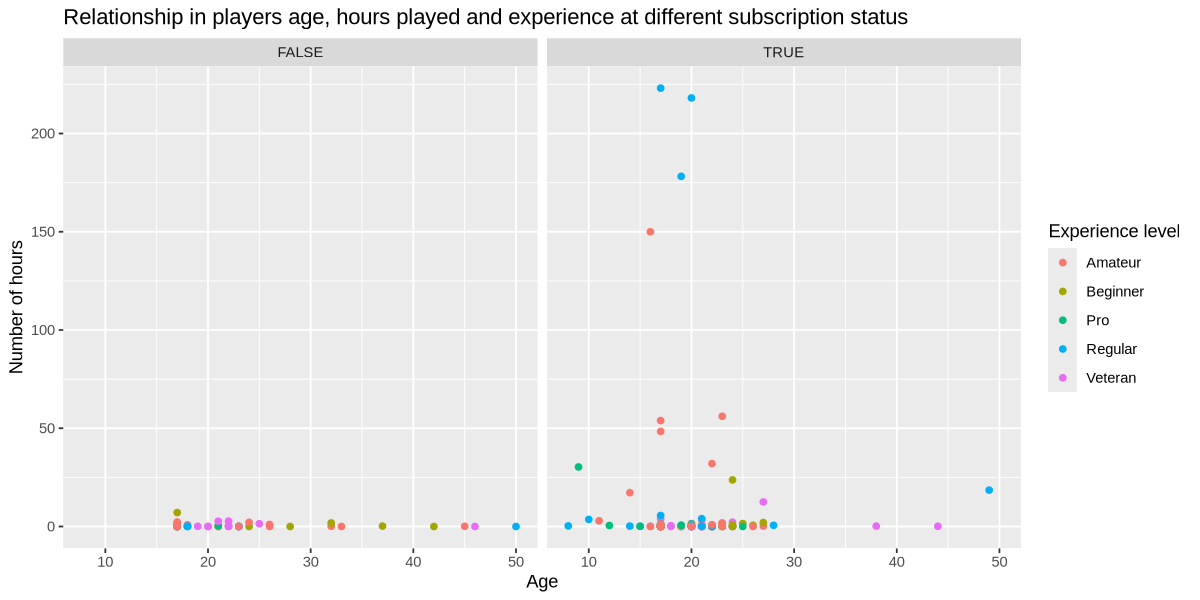

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)

players_scatterplot <- players_wrangle |>
    ggplot(aes(x=Age, y=played_hours, color=experience)) +
    geom_point() +
    labs(color = "Experience level") +
    xlab("Age") + 
    ylab("Number of hours") +
    facet_grid(cols=vars(subscribe))+
    ggtitle("Relationship in players age, hours played and experience at different subscription status")
players_scatterplot

Interpretation of the scatterplot: There are more points scattered across the graph that has a "True" subscription status. This means that players of different experience levels spent more hours on the game when they are subscribed.

This is the step and plot for a barplot.

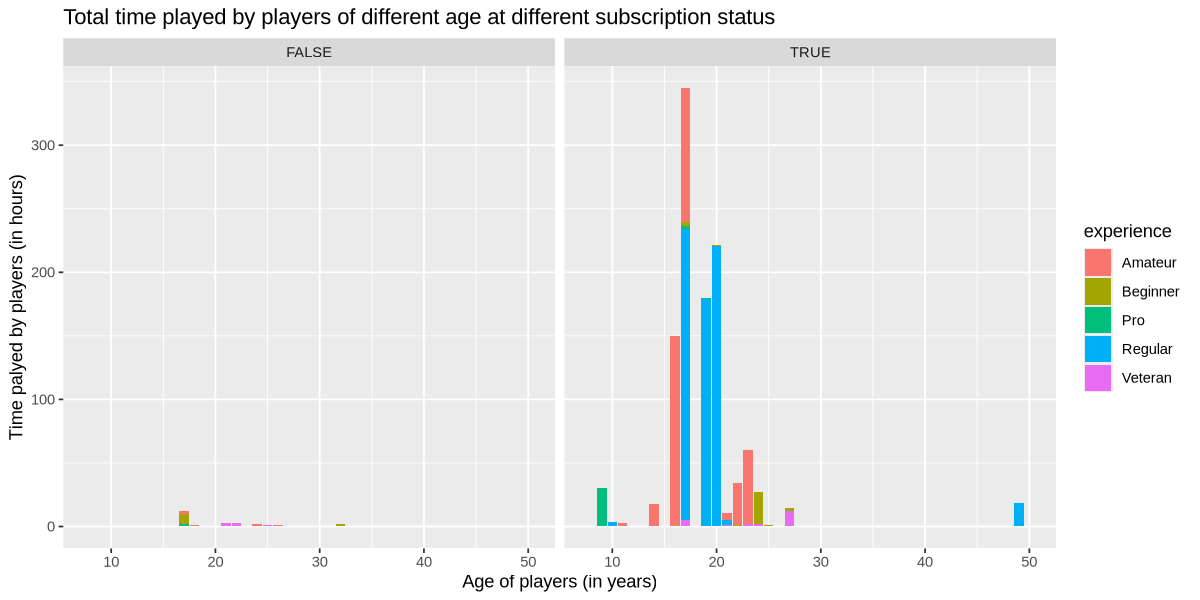

In [20]:
options(repr.plot.width = 10, repr.plot.height = 5)

players_barplot <- ggplot(players_wrangle, aes(x = Age, y = played_hours, fill = experience)) +
    geom_bar(stat="identity") + 
    labs(x = "Age of players (in years)", y = "Time palyed by players (in hours)", title = "Total time played by players of different age at different subscription status") +
    facet_grid(cols=vars(subscribe))
players_barplot

Interpretation of the barplot: There are more bars on the graph that has a "True" subscription status. This means that players of different experience levels spent more hours on the game when they are subscribed.

## (4) Methods and Plan: 
After visualizing the data, KNN classification can used to address the question of interest. This predictive tools is used because we are trying to understand how the 3 predictors (`age`, `played_hours`, and `experience`) will help to predict the subscription status of a new player. The assumptions about this selected method is data points that are close together are more likely to have the same predicted outcome. 

However, as much as KNN classification works well on any type of data, there are a few limitations regarding this data set. There are a lot of zero values for the `played_hours` column, this will make it hard when the predicted data point is a value way above zero. This will lead to inaccurate prediction. Also, there are two NA values in `Age` so there are two rows of discarded data. Moreover, the presense of outliers/ extreme values can lead to incorrect classification. Though, the current plotted data are not standardized and these limitations might be improved when they are scaled. 

In order to process the data to apply the model, we are going to split the data into training set (70%) and testing set (30%) before model training. We will then carry out a 5-fold cross-validation to select k value. 